<h1 align="center">Instacart Market Basket Analysis</h1>

<b>Instacart delivers groceries from local stores in as fast as 1 hour.</b>
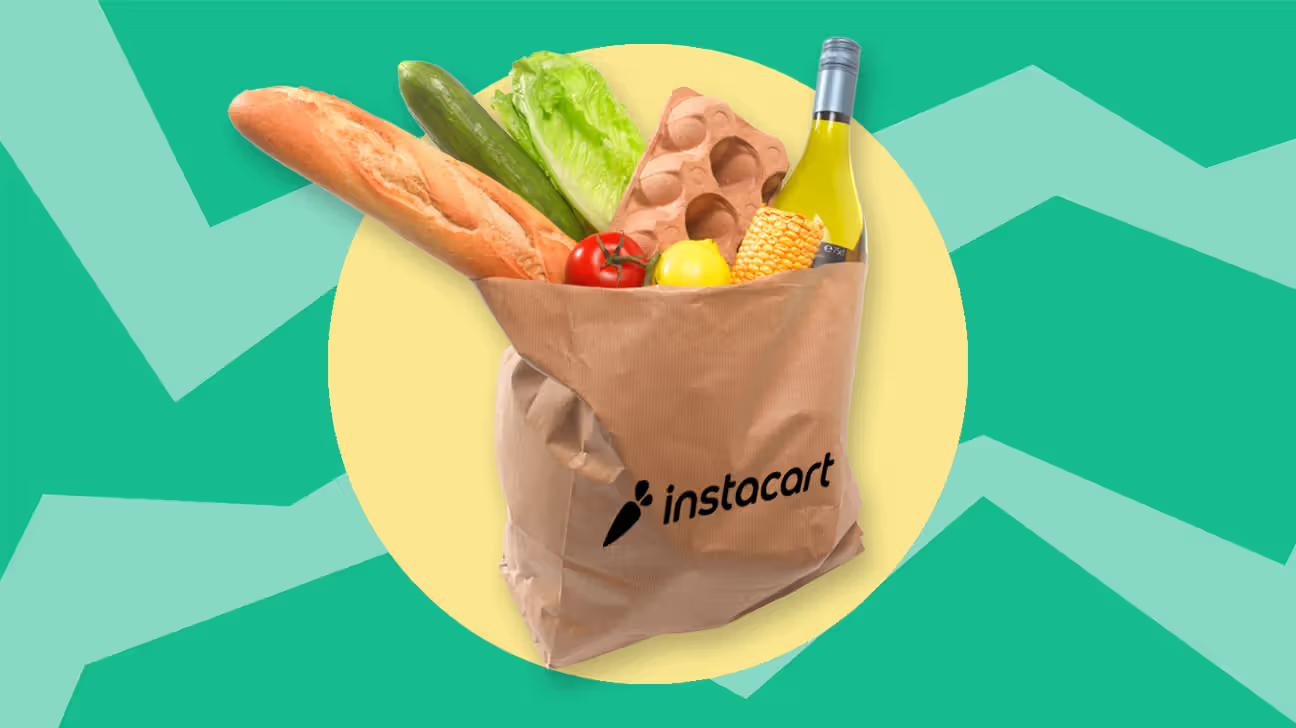

## EDA

### Dataset Description
The dataset for this competition is a relational set of files describing customers' orders over time. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. Each user, has between 4 and 100 of their orders, with the sequence of products purchased in each order. Week and hour of day the order was placed is provided, and a relative measure of time between orders.

##### Import Python Libraries 
Let us start by importing the necessary modules and read the csv files into DataFrames.


In [1]:
import numpy as np
import pandas as pd

# visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#color = sns.color_palette()

%matplotlib inline

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

##### Reading Dataset

In [3]:
dfAisl = pd.read_csv("aisles.csv")
dfDept = pd.read_csv("departments.csv")
dfOrds = pd.read_csv("orders.csv")
dfProd = pd.read_csv("products.csv")
dfOrdProdPrior = pd.read_csv("order_products__prior.csv")
dfOrdProdTrain =  pd.read_csv("order_products__train.csv")
#Combining both order_products_train and order_products_prior dataframes as we are interested in all the orders.
dfOrdProd  = pd.concat([dfOrdProdPrior,dfOrdProdTrain])
#Merging the order products, aisles, and departments to one file 
dfMerged = pd.merge(dfOrdProd, dfProd, on='product_id', how='left')
dfMerged = pd.merge(dfMerged, dfAisl, on='aisle_id', how='left')
dfMerged = pd.merge(dfMerged,dfDept,on='department_id', how = 'left')

### Analyze the Data

In [5]:
print(f"Aisles file has {dfAisl.shape[0]} rows and  {dfAisl.shape[1]} columns")
print(f"Department file has {dfDept.shape[0]} rows and  {dfDept.shape[1]} columns")
print(f"order_products__prior file has {dfOrdProdPrior.shape[0]} rows and  {dfOrdProdPrior.shape[1]} columns")
print(f"order_products__train file has {dfOrdProdTrain.shape[0]} rows and  {dfOrdProdTrain.shape[1]} columns")
print(f"orders file has {dfOrds.shape[0]} rows and  {dfOrds.shape[1]} columns")
print(f"products file has {dfProd.shape[0]} rows and  {dfProd.shape[1]} columns")

Aisles file has 134 rows and  2 columns
Department file has 21 rows and  2 columns
order_products__prior file has 32434489 rows and  4 columns
order_products__train file has 1384617 rows and  4 columns
orders file has 3421083 rows and  7 columns
products file has 49688 rows and  4 columns


See the sample of data 

In [7]:
dfAisl.head(2)

aisle_id                  aisle
0         1  prepared soups salads
1         2      specialty cheeses

In [9]:
dfDept.head(2)

department_id department
0              1     frozen
1              2      other

In [11]:
dfOrds.head(2)

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   

   days_since_prior_order  
0                     NaN  
1                    15.0

In [13]:
dfProd.head(2)

product_id                product_name  aisle_id  department_id
0           1  Chocolate Sandwich Cookies        61             19
1           2            All-Seasons Salt       104             13

In [15]:
dfOrdProd.head(2)

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1

In [17]:
dfMerged.head(2)

order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   

   aisle_id  department_id             aisle  department  
0        86             16              eggs  dairy eggs  
1        83              4  fresh vegetables     produce

As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.


The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?

As mentioned earlier, in this dataset, 4 to 100 orders of a customer are g.red. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes toOrder_products*csv file has more detailed information about the products that been bought in the given order along with the re-ordered status.
We have combined  both order_products_train and order_products_prior dataframes as we are interested in all the orders.atus.

##### Missing Values Calculation
 calculate the percentage of missing values in each column

In [19]:
((dfOrds.isnull().sum()/dfOrds.shape[0])*100).round(2)

order_id                  0.00
user_id                   0.00
eval_set                  0.00
order_number              0.00
order_dow                 0.00
order_hour_of_day         0.00
days_since_prior_order    6.03
dtype: float64

Only days_since_prior_order has 6% of null values.
##### Summary stats 

In [21]:
dfOrds.describe()

order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.500000e+01  
max         2.300000e+01            3.000000e+01

##### Check for Duplication

In [23]:
dfOrds.duplicated().sum()

0

Let us see the relationship between orders, hr, day and users

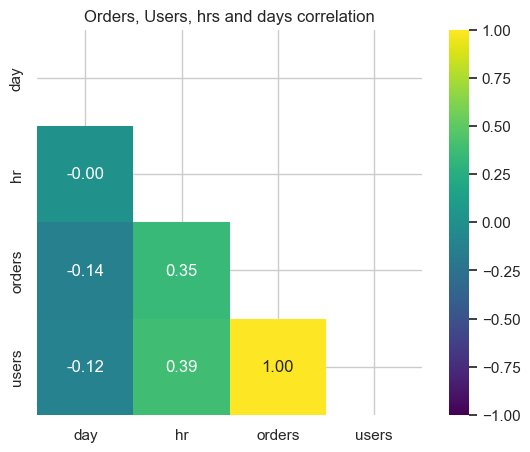

In [25]:
dfC = dfOrds.groupby(["order_dow", "order_hour_of_day"])[['order_id','user_id']].aggregate("nunique").reset_index()
dfC.columns=["day","hr",'orders','users']
# Calculate correlation between each pair of variable
corr_matrix=dfC.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr_matrix, mask=mask, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True)
# versions of matplotlib ans seaborn that work for annotation.
# mat.__version__, sns.__version__
# ('3.7.5', '0.13.2')
plt.title("Orders, Users, hrs and days correlation")
plt.show()

As we can see as users increase, orders increase correspondingly. Hour of the day has a slight correlation. 
On the other hand day isn't in any way correlated to the other variables.

##### Department wise distribution

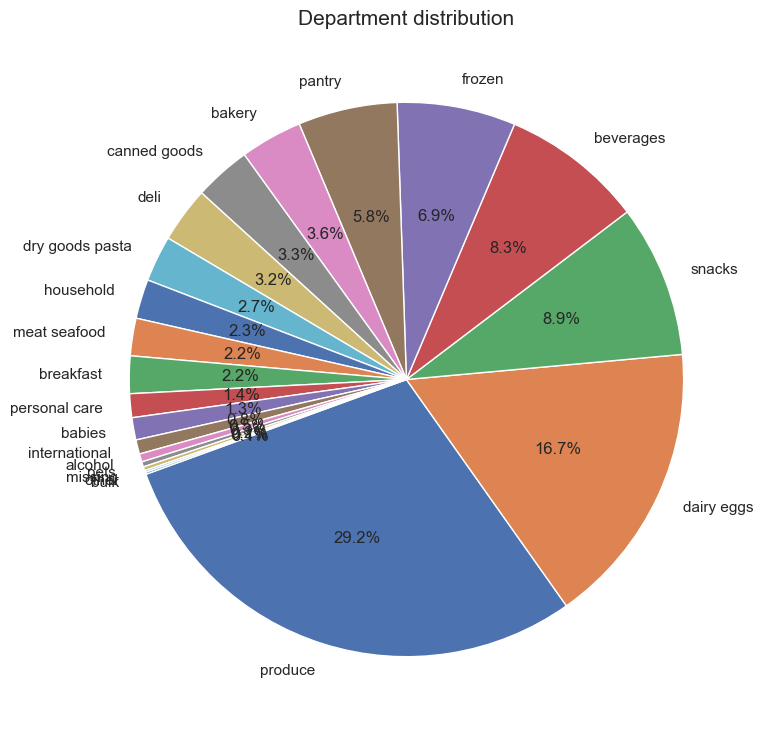

In [27]:
plt.figure(figsize=(9,9))
dpt_series = dfMerged['department'].value_counts()
labels = (np.array(dpt_series.index))
sizes = (np.array((dpt_series / dpt_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Department distribution", fontsize=15)
plt.show()

Anayzing the top 20 Aisles in terms of number of products stocked.

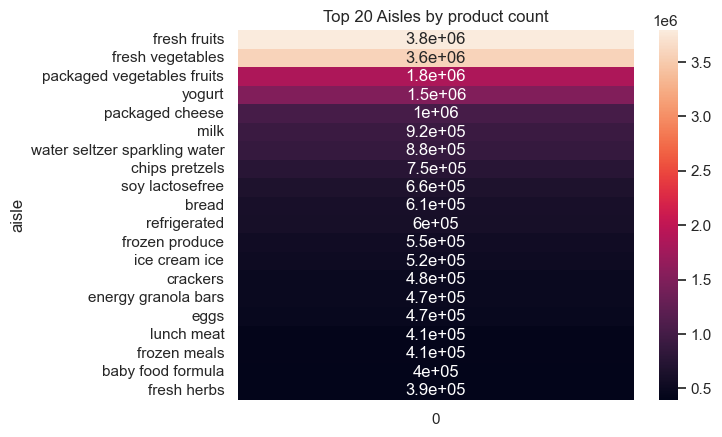

In [30]:
dfx =dfMerged.groupby('aisle')['product_id'].count().sort_values(ascending=False).head(20)
sns.heatmap(pd.DataFrame(dfx.values, index=dfx.index),annot=True)
plt.title("Top 20 Aisles by product count")
plt.show()

Fresh fruits aisle is stocked the most(about 3.8 million), followed fresh vegetables. 
##### Aisles organized within departments and products ordered

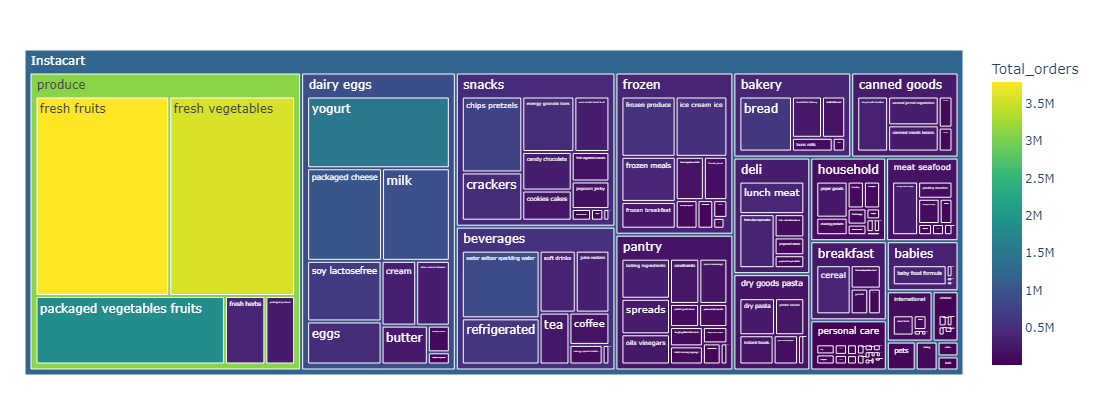

In [35]:
dagroups = dfMerged.groupby(["department", "aisle"])["order_id"].aggregate('count').reset_index()
dagroups.columns = ["department","aisle","Total_orders"]
fig = px.treemap(dagroups, path=[px.Constant("Instacart"),'department', 'aisle'], values='Total_orders',
                 color = 'Total_orders',width=800, height=400,
                  color_continuous_scale='Viridis')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## Descriptive Analytics 
#### Busiest day of the week
Get the frequency counts of day of week orders

In [37]:
dfOrds['order_dow'].value_counts()

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64

Looks like day "0" has the hiighest orders followed by day 1. So Saturday must be day 0 and Sunday day 1. 
Let us map day names to day numbers using dictionary.

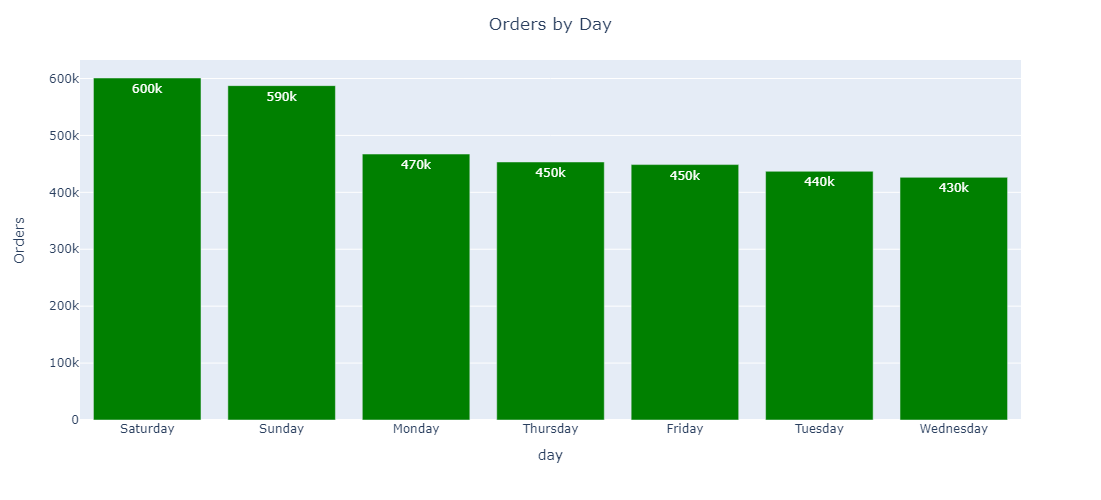

In [39]:
dow_dict = {0:"Saturday", 1:"Sunday", 2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday"}
dfOrds = dfOrds.assign(order_day_name=dfOrds['order_dow'].map(dow_dict))
busdayofweek = dfOrds.order_day_name.value_counts().reset_index()
busdayofweek.columns = ['day','Orders']
fig = px.bar(busdayofweek, x="day", y="Orders",  text_auto='.2s',height=500,width=600)
fig.update_traces(marker_color='green')
fig.update_layout(title_text='Orders by Day', title_x=0.5)
fig.show()

Busiest day of week is <b><u>Saturday</u></b> with about 600K orders.

#### Busiest hour of the day

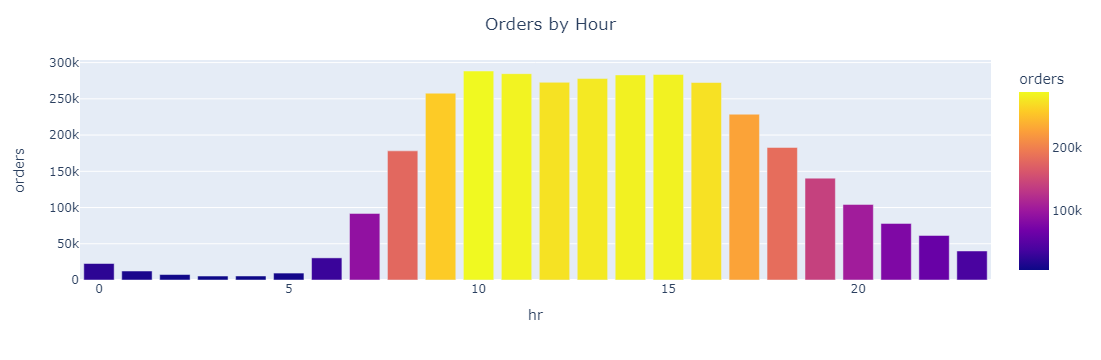

In [41]:
ordbyhr = dfOrds.groupby(by=["order_hour_of_day"])['order_id'].nunique().sort_values(ascending=False).reset_index()
ordbyhr.columns = ['hr','orders']
#ordbyhr
color_discrete_sequence = ['#ec7c34']*len(ordbyhr)
color_discrete_sequence[9] = '#609cd4'
fig = px.bar(data_frame=ordbyhr,x="hr",y="orders", color = 'orders', color_discrete_sequence=color_discrete_sequence)
fig.update_layout(title_text='Orders by Hour', title_x=0.5)
fig.show()


Busiest hour of the day is <b>10 am to 11 am </b>. 288418 orders are between 10 am and 11 am. 10 am to 4 pm seems to be busier.

#### Best seller product

In [43]:
dfTop20prods = dfMerged['product_name'].value_counts().reset_index().head(20)
dfTop5prods = dfTop20prods.head()
rows_to_color = [0]
color = "yellow"
dfTop5prods = dfTop5prods.style.applymap(lambda _: f"background-color: {color}",
                  subset=(dfTop20prods.index[rows_to_color],))
#table = dfTop20prods.to_string(index=False)
#print(table)
dfTop5prods

Looks like Banana's are very popular.
"<b>Banana</b>" is the top selling product followed by "Bag of Organic Bananas"

#### Best seller by Department

In [45]:
dfTopDept = dfMerged['department'].value_counts().reset_index().head(20)
dfTop5Dept = dfTopDept.head(5)
rows_to_color = [0]
color = "yellow"
dfTop5Dept = dfTop5Dept.style.applymap(lambda _: f"background-color: {color}",
                  subset=(dfTop5Dept.index[rows_to_color],))
dfTop5Dept

<b>Produce department</b> is the top selling department. Way ahead of dairy eggs which comes second.

#### Highest reorder of products

In [47]:
dfreorder = dfMerged[dfMerged['reordered'] == 1]['product_name'].value_counts().reset_index().head(10)
dfreordered = dfreorder.head()
rows_to_color = [0]
color = "yellow"
dfreordered = dfreordered.style.applymap(lambda _: f"background-color: {color}",
                  subset=(dfreordered.index[rows_to_color],))
dfreordered

In [49]:
print(f"The highest reordered product is {dfreorder.iloc[0,0]}")

The highest reordered product is Banana


<b>Banana</b> has been reordered the most.
#### Histogram of customer retention (reordering)

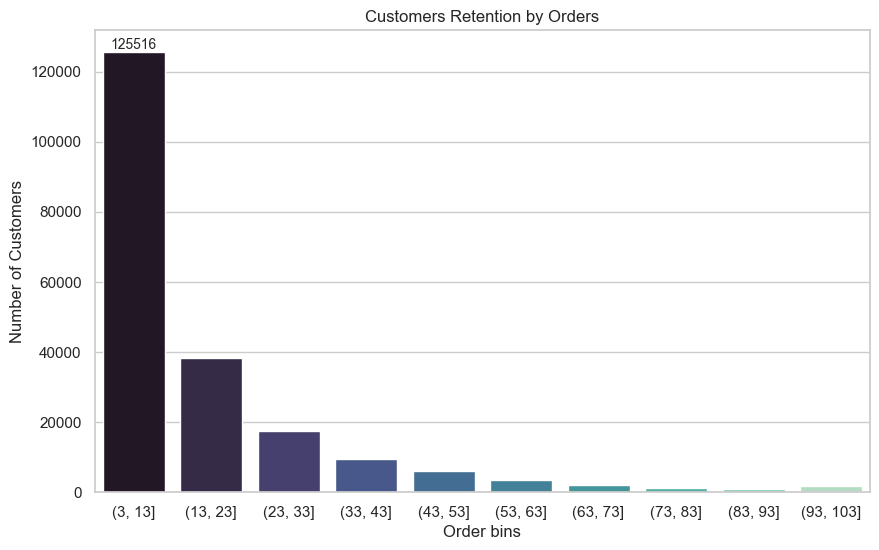

In [51]:
dfUsersOrds = dfOrds.groupby('user_id')['order_number'].max().reset_index()
dfUsersOrds.columns = ['user_id', 'orders']
dfUsersOrds['order_bins'] = pd.cut(x=dfUsersOrds.orders, bins=list(range(np.min(dfUsersOrds.orders)-1, np.max(dfUsersOrds.orders)+6,10)))
# count distinct customers in each bin
total_cust = pd.DataFrame(dfUsersOrds.groupby('order_bins', as_index=False).agg({'user_id':'nunique'}))
total_cust.columns = ['order_bins','total_cust']
total_cust['order_bins'] =total_cust['order_bins'].astype('str') #TypeError: Object of type Interval is not JSON serializable
# create a bar plot to see the number of unique customers per cohort
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(data = total_cust, x = 'order_bins', y = 'total_cust', palette = 'mako')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Customers Retention by Orders', fontsize = 12)
plt.xlabel('Order bins')
plt.ylabel('Number of Customers')
plt.show()

Number of customers with orders between 3 and 13 are the most. Customer retention rate decreases with orders.

##### Customers and the number of orders

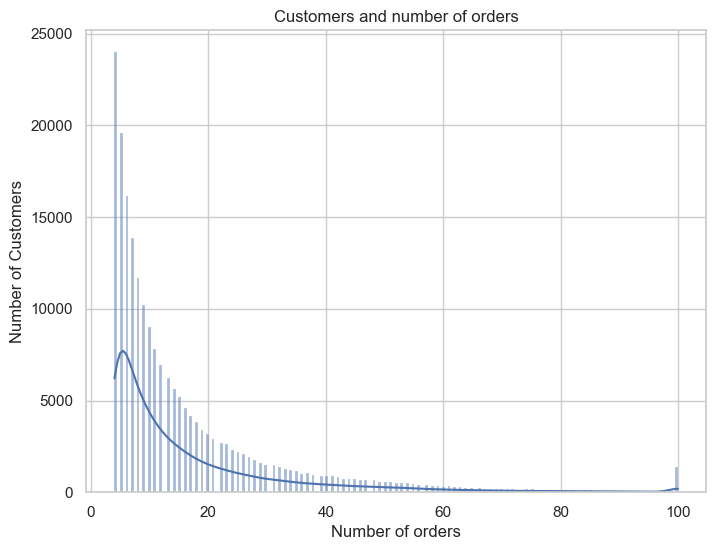

In [53]:
# create a bar plot to see the number of unique customers 
fig, ax = plt.subplots(figsize = (8, 6))
sns.histplot(data = dfUsersOrds, x = 'orders',kde=True)#, y = 'orders'
plt.title('Customers and number of orders', fontsize = 12)
plt.xlabel('Number of orders')
plt.ylabel('Number of Customers')
plt.show()

Another view

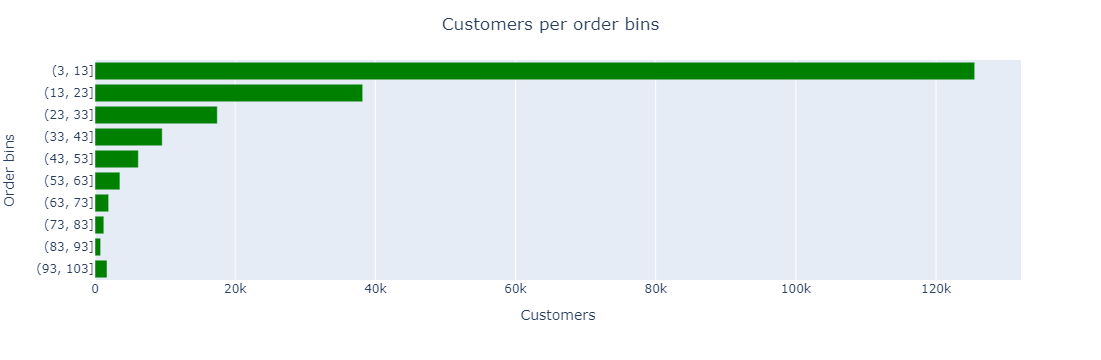

In [56]:
import plotly.express as px
fig = px.bar(total_cust, y="order_bins", x="total_cust",orientation='h')
fig.update_traces(marker_color='green')
fig.update_layout(title_text='Customers per order bins', title_x=0.5)
fig.update_layout(yaxis=dict(autorange="reversed"),xaxis_title="Customers", yaxis_title="Order bins")
fig.show()

## Enriching Analytics
Let us combine the day of week and hour of day to see the distribution.

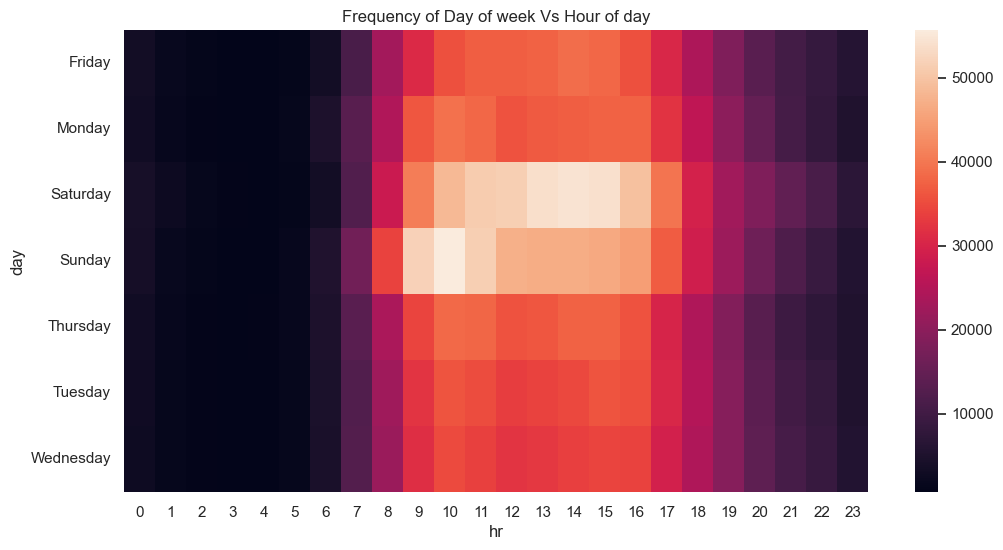

In [58]:
dfDayHr = dfOrds.groupby(['order_day_name','order_hour_of_day'])['order_id'].aggregate('nunique').reset_index()
dfDayHr.columns = ['day','hr','orders']
dfDayHrpi = dfDayHr.pivot(index='day', columns='hr', values='orders')
plt.figure(figsize=(12,6))
sns.heatmap(dfDayHrpi)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.
##### Re-order percentage

In [60]:
ser = dfMerged['reordered'].value_counts(normalize=True)
ser

reordered
1    0.590062
0    0.409938
Name: proportion, dtype: float64

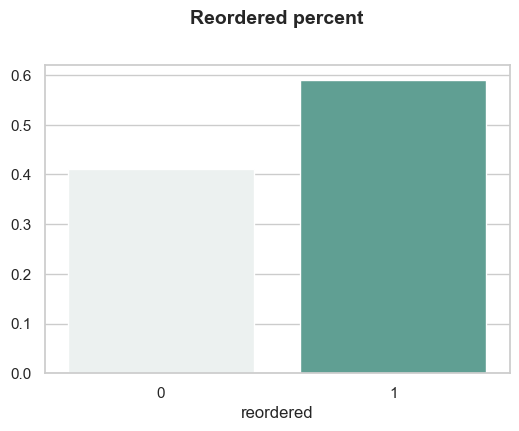

In [62]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=ser.index, y =ser.values, palette = 'light:#5A9')
ax.set_title("Reordered percent", fontsize=14, pad=30, fontdict={"weight": "bold"})
plt.show()

About 59% of the products are re-ordered products and 41 % of the products are not reordered.
Now let us analyze the top products reordered and not reordered percentage individually.

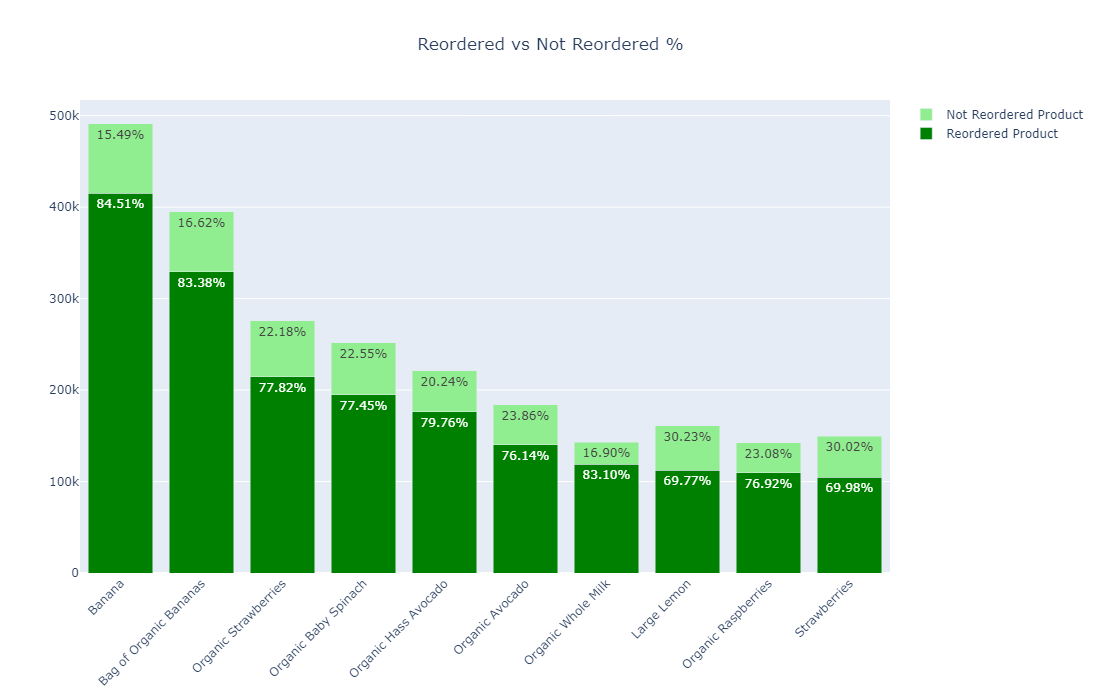

In [64]:
dfNre = dfMerged[dfMerged['reordered'] == 0]['product_name'].value_counts()
dfReo = dfMerged[dfMerged['reordered'] == 1]['product_name'].value_counts().head(20)
dfReoNreMerged = pd.merge(dfReo,dfNre, on='product_name', how="left")
dfReoNreMerged= dfReoNreMerged.reset_index()
dfReoNreMerged.columns=["product","Reordered","No_Reorder"]
dfReoNreMerged = dfReoNreMerged.head(10)
dfReoNreMerged["Reordered%"]=(100*(dfReoNreMerged["Reordered"])/(dfReoNreMerged["Reordered"]+dfReoNreMerged["No_Reorder"])).round(2)
dfReoNreMerged["NotReordered%"]=(100*(dfReoNreMerged["No_Reorder"])/(dfReoNreMerged["Reordered"]+dfReoNreMerged["No_Reorder"])).round(2)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dfReoNreMerged['product'],
    y=dfReoNreMerged['Reordered'],
    text=dfReoNreMerged['Reordered%'].apply(lambda x: '{0:1.2f}%'.format(x)),
    name='Reordered Product',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=dfReoNreMerged['product'],
    y=dfReoNreMerged['No_Reorder'],
    text=dfReoNreMerged['NotReordered%'].apply(lambda x: '{0:1.2f}%'.format(x)),
    name='Not Reordered Product',
    marker_color='lightgreen'
    
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack', xaxis_tickangle=-45,height=700)
fig.update_layout(title_text='Reordered vs Not Reordered %', title_x=0.5)
fig.show()

Add to Cart - Reorder ratio:

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

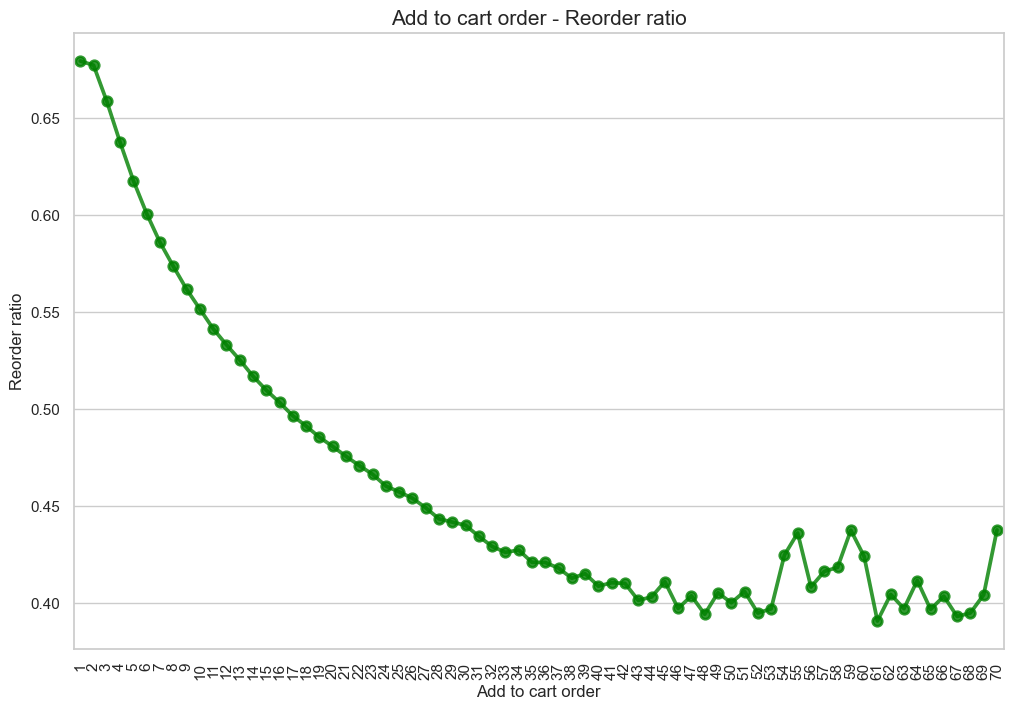

In [66]:
dfOrdProd["add_to_cart_order_mod"] = dfOrdProd["add_to_cart_order"].copy()
dfOrdProd["add_to_cart_order_mod"].loc[dfOrdProd["add_to_cart_order_mod"]>70] = 70
cartdf = dfOrdProd.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x=cartdf['add_to_cart_order_mod'].values, y=cartdf['reordered'].values, alpha=0.8,color="green")
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

##### New Customers Analysis

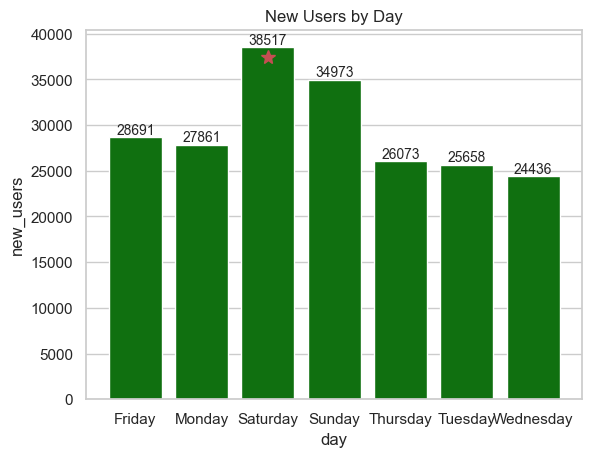

In [68]:
dfNewUsers = dfOrds.loc[dfOrds['order_number'] == 1].groupby(['order_day_name'])['user_id'].aggregate('nunique').reset_index()
dfNewUsers.columns = ["day","new_users"]
ax = sns.barplot(data=dfNewUsers, x="day", y="new_users",color="green")
ax.bar_label(ax.containers[0], fontsize=10);
ax.plot("Saturday",37500, "*", markersize=10, color="r")
plt.title("New Users by Day")
plt.show()          

Weekends(Saturday and Sunday) are the days when users venture and start using the instacart for the first time.
##### Top 3  Aisles in each Department (by number of Products)

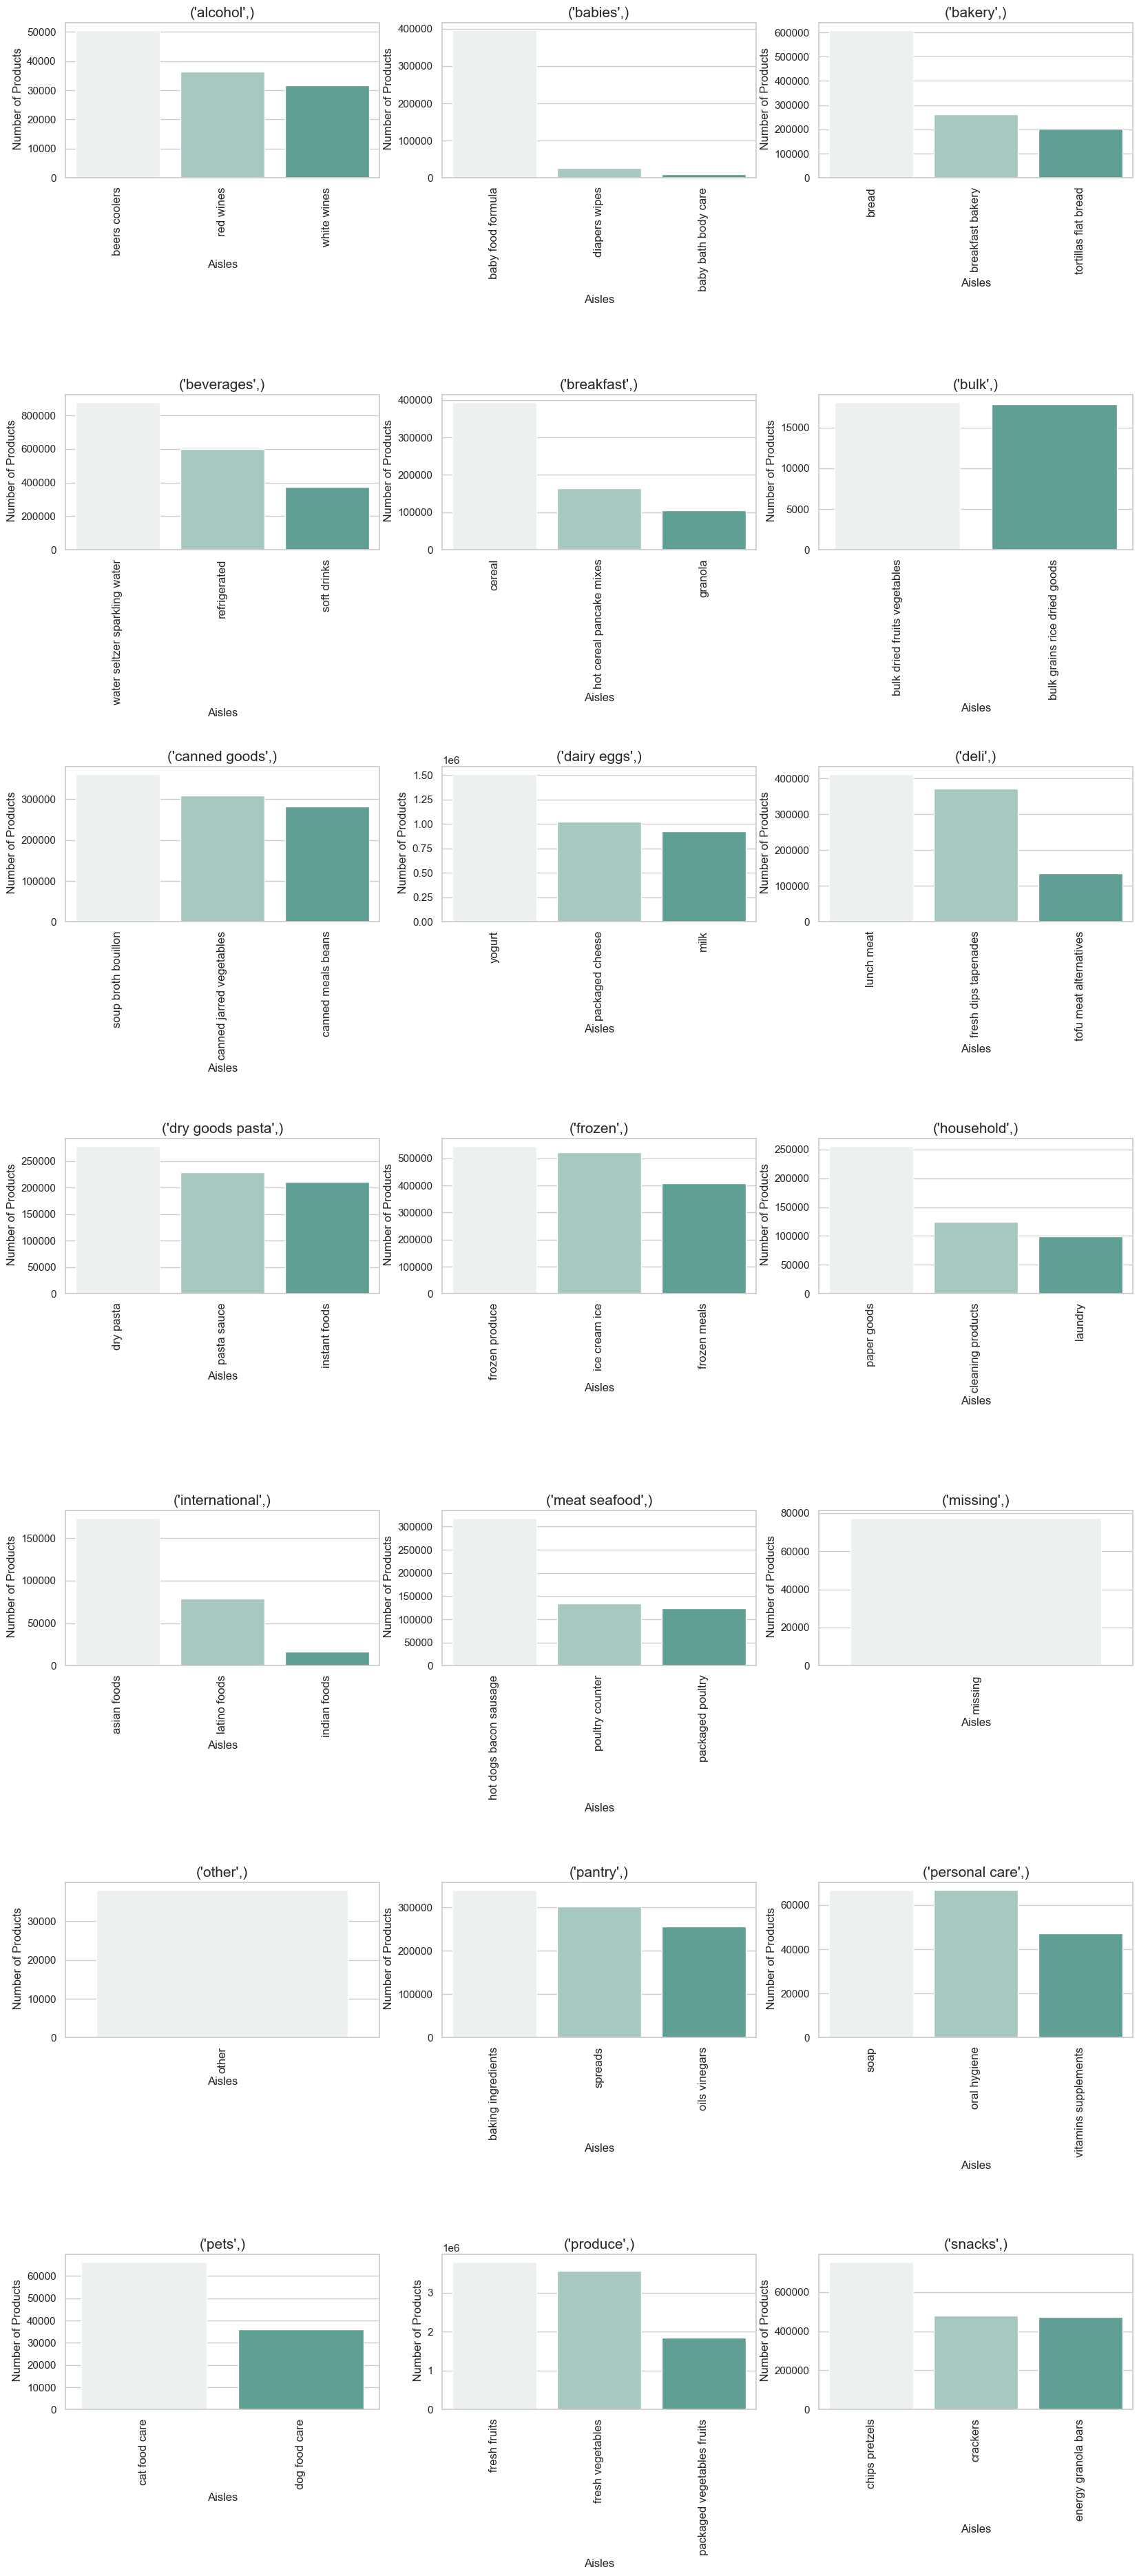

In [70]:
dfdap =dfMerged.groupby(["department", "aisle"],as_index=False)["product_id"].aggregate('count')
dfdap.columns = ["department","aisle","total_products"]
dfdap = dfdap.reset_index()
dfdap.columns=["level_1","department","aisle","total_products"]
dfdapl =dfdap.groupby('department')['total_products'].nlargest(3).reset_index()
dfall =pd.merge(dfdapl[["department","level_1","total_products"]],dfdap[["level_1","aisle"]],on='level_1', how = 'left')
dfall = dfall.drop("level_1", axis=1)
dfall.sort_values(by='total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(dfall.groupby(["department"]), axes.flatten()):
    g = sns.barplot(x=group.aisle, y=group.total_products , ax=ax, palette = 'light:#5A9')
    ax.set(xlabel = "Aisles", ylabel=" Number of Products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    g.set_title(aisle, fontsize=15)

GitHub - https://github.com/Revakoth/Instacart